In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import joblib

# 더 필요한 라이브러리를 아래에 추가합니다.
import matplotlib
plt.style.use('seaborn-whitegrid')
!pip install statsmodels
!pip install pmdarima

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima

%matplotlib inline

import itertools

<ipython-input-1-250e88fbb2c1>:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 14.5 MB/s eta 0:00:00


In [2]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import joblib
path = '/content/drive/MyDrive/KT_aivle/미니프로젝트6차/장애인콜택시대기시간/'
df = joblib.load(path+'data1.pkl')
data = df.drop_duplicates(subset=['Date'], keep='first')
df.head()

,Date,N_of_Cars,N_of_apply,N_of_rides,Waiting_T,Price,Distance,year,month,week,...,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2),day_of_week,Roll_Waiting_T,holiday,target,Roll_N_of_rides
0,2015-01-01,213,1023,924,23.2,2427,10764,2015,1,1,...,-9.8,0.0,52.0,33.0,9.79,3,23.200,1.0,17.2,924.00
1,2015-01-02,420,3158,2839,17.2,2216,8611,2015,1,1,...,-8.9,0.0,63.0,28.0,9.07,4,20.200,0.0,26.2,1881.50
2,2015-01-03,209,1648,1514,26.2,2377,10198,2015,1,1,...,-9.2,0.0,73.0,37.0,8.66,5,22.200,0.0,24.5,1759.00
3,2015-01-04,196,1646,1526,24.5,2431,10955,2015,1,1,...,0.2,0.0,89.0,58.0,5.32,6,22.775,0.0,26.2,1700.75
4,2015-01-05,421,4250,3730,26.2,2214,8663,2015,1,2,...,-0.9,0.0,95.0,52.0,6.48,0,23.460,0.0,23.6,2106.60


In [4]:
df = df[['Date','target']]

In [5]:
df.index = df['Date']
df = df.drop('Date', axis=1)
df

,target
Date,
2015-01-01,17.2
2015-01-02,26.2
2015-01-03,24.5
2015-01-04,26.2
2015-01-05,23.6
...,...
2022-12-27,44.8
2022-12-28,52.5
2022-12-29,38.3


In [6]:
df = df.dropna()

# raw data 확인

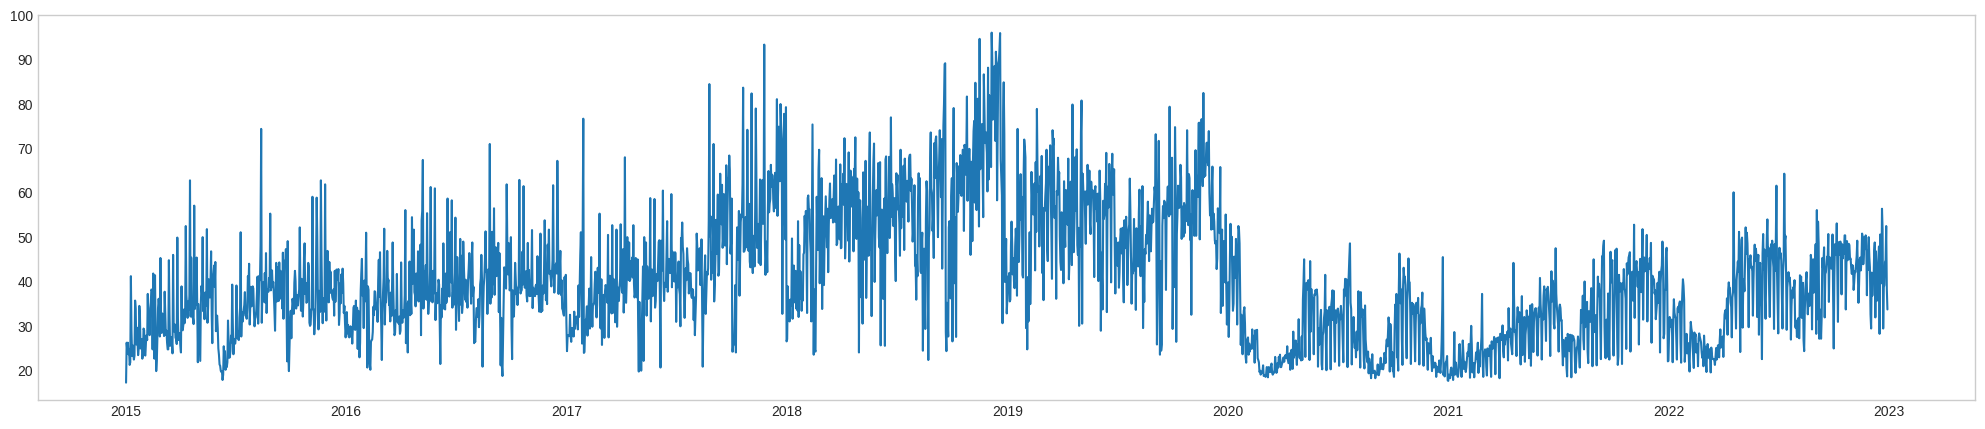

In [7]:
plt.figure(figsize=(25,5))
plt.plot(df)
plt.grid()

In [7]:
df = np.log(df)

# seasonal decomposition

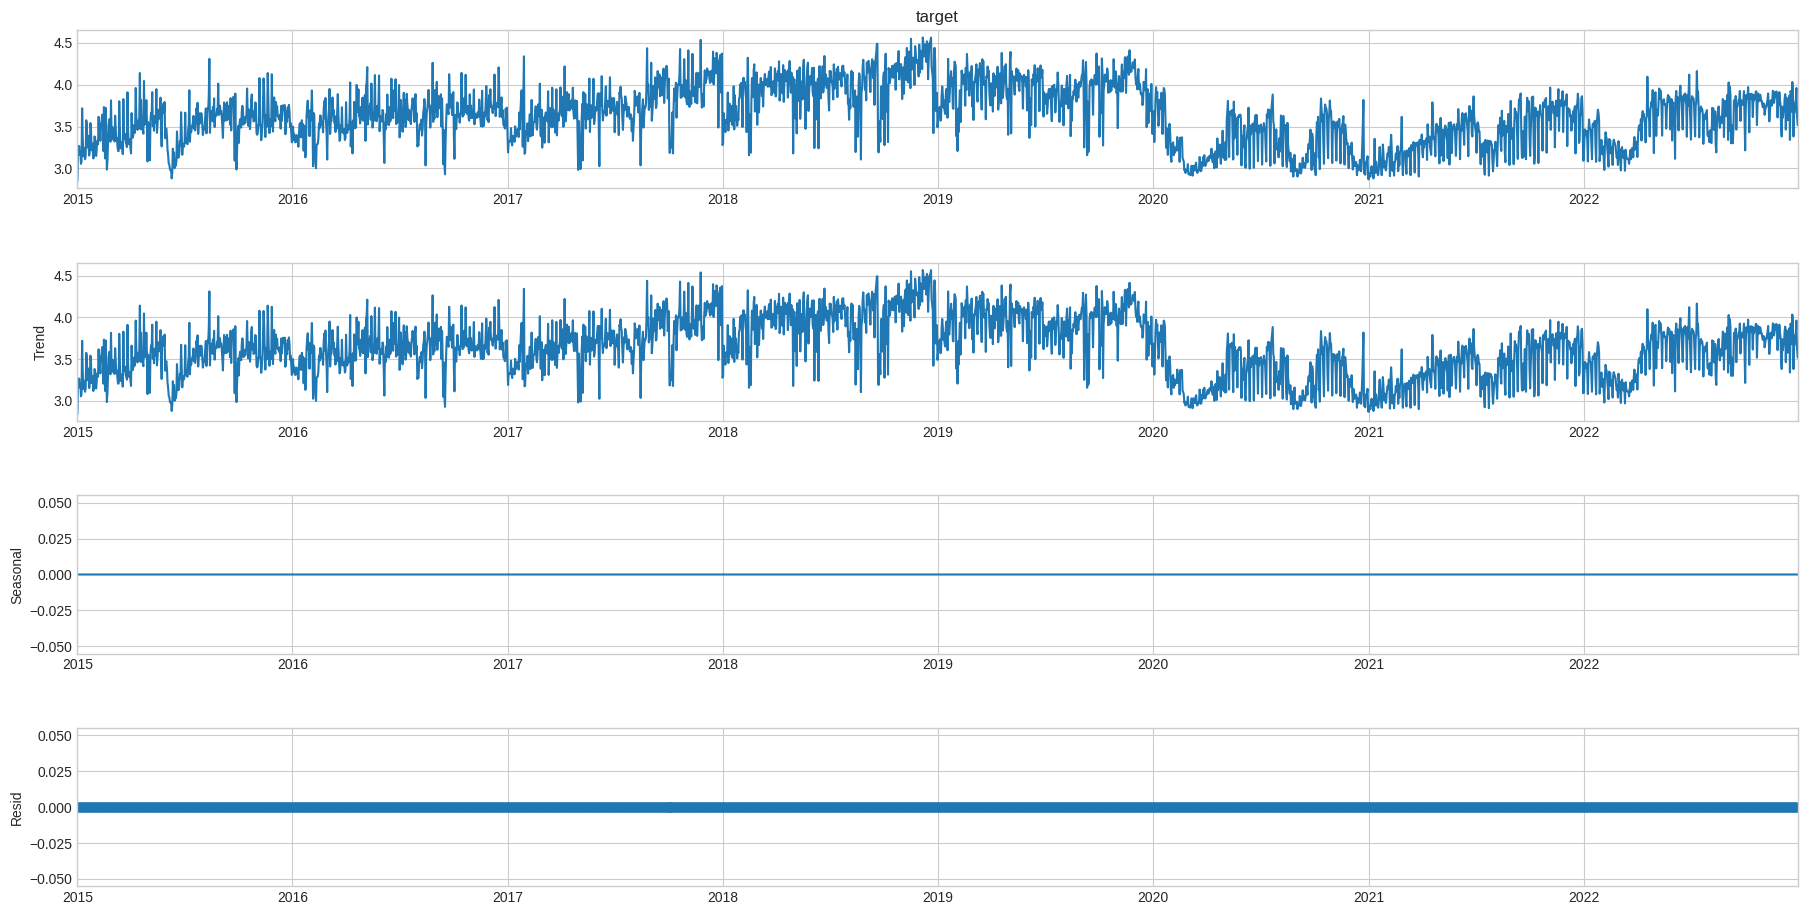

In [9]:
decomposition = sm.tsa.seasonal_decompose(df['target'], model = 'additive', period=1)
fig = decomposition.plot()
fig.set_size_inches(20,10)
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.01, shuffle=False)
train.shape, test.shape

((2894, 1), (30, 1))

# ACF, PACF

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


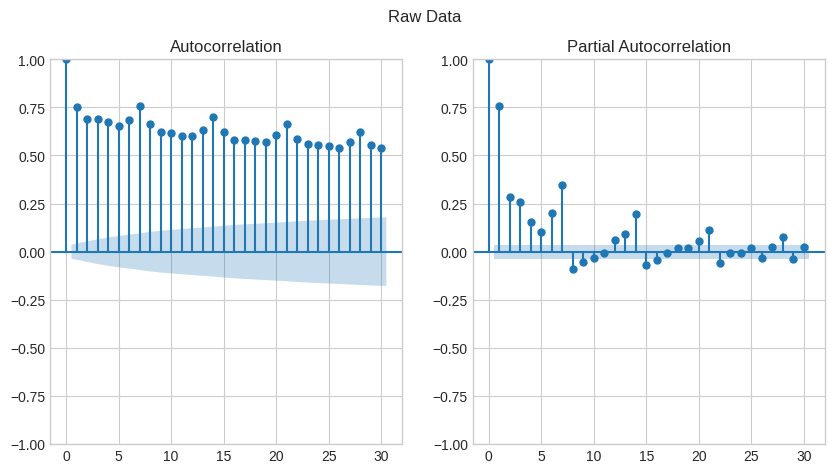

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))
fig.suptitle('Raw Data')
sm.graphics.tsa.plot_acf(train.values.squeeze(), lags=30, ax=ax[0]) # auto correlation ft
sm.graphics.tsa.plot_pacf(train.values.squeeze(), lags=30, ax=ax[1]); # partial auto correlation ft

* auto correlation의 경우 파도 모양으로 구성되어 있다면 대표적인 Trend가 있어 non-stationary 한 데이터에서 발생하는 그런 acf plot으로 볼 수 있다. 

==> 위에서 rawdata, seasonal_decomposition, acf/pacf 를 확인해 보았을 때 대략적으로 non-stationary하다고 볼 수 있다.

==> 이 non-stationary한 것을 stationary하게 보정하기 위해 차분을 사용한다.

# differencing

In [17]:
diff_train = train.diff(7)
diff_test = test.diff(7)

In [18]:
diff_train = diff_train.dropna()
diff_test = diff_test.dropna()

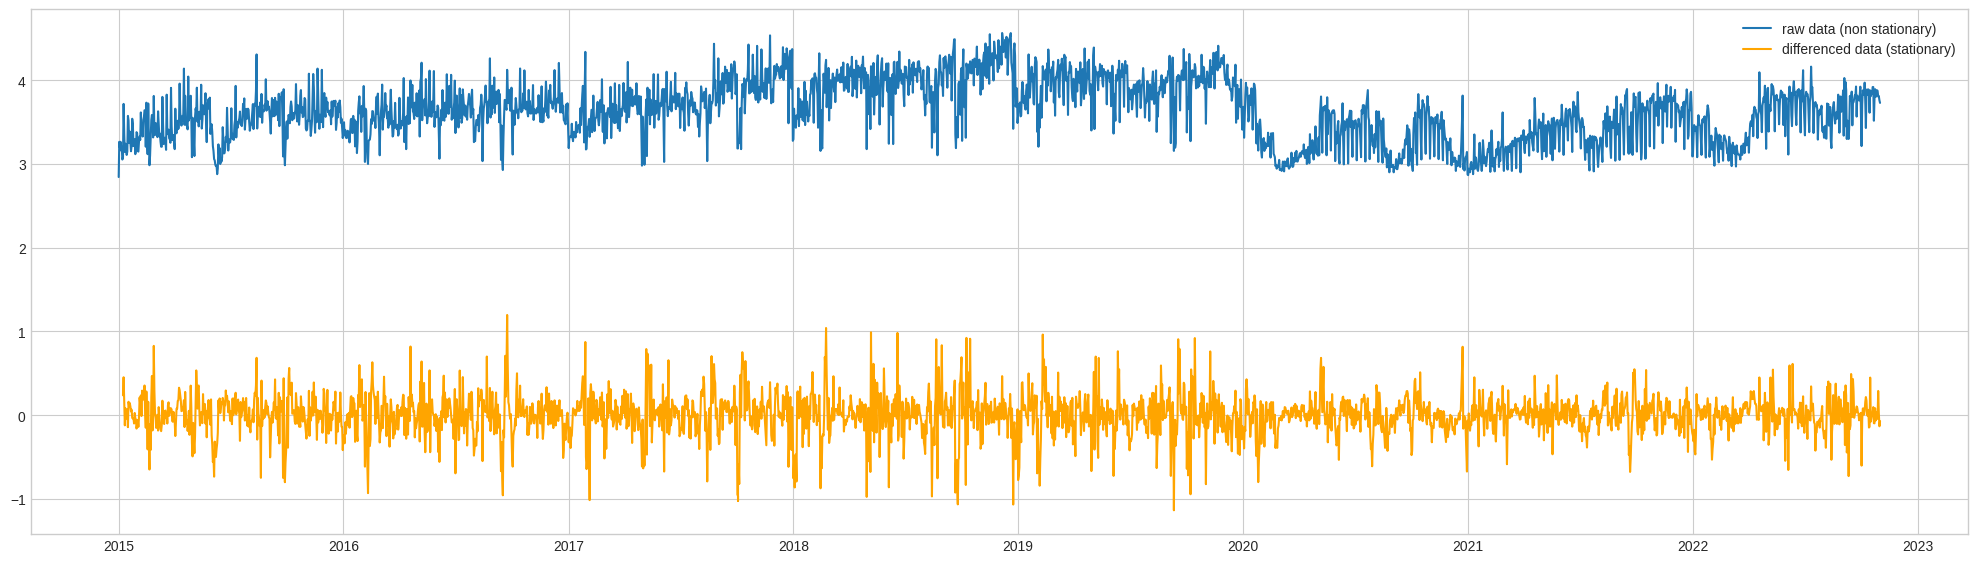

In [19]:
plt.figure(figsize=(25,15))
plt.subplot(2, 1, 1)
plt.plot(train['target'])
plt.subplot(2, 1, 1)
plt.plot(diff_train['target'], 'orange')
plt.legend(['raw data (non stationary)', 'differenced data (stationary)'])
plt.show()

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


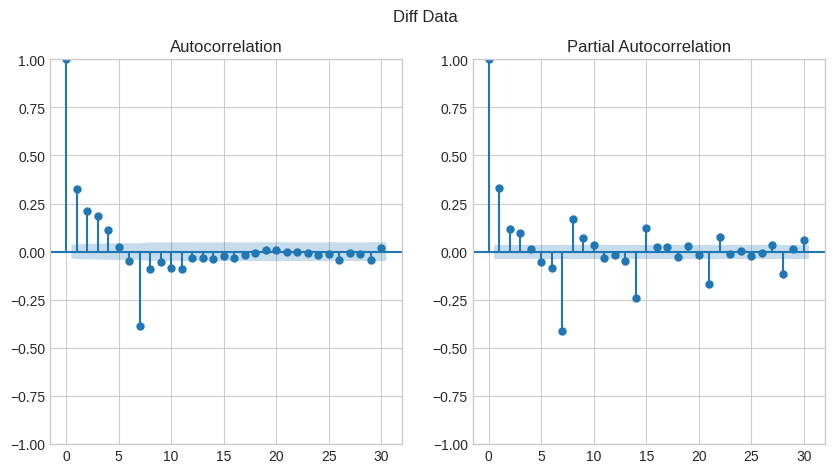

In [20]:
# 1차 차분한 데이터를 대상으로 ACF와 PACF 확인

fig, ax = plt.subplots(1, 2, figsize=(10,5))
fig.suptitle('Diff Data')
sm.graphics.tsa.plot_acf(diff_train.values.squeeze(), lags=30, ax=ax[0]) # auto correlation ft - sin함수와 같이 형태가 바뀌고 어느 정도 높이가 감소하였다. 
sm.graphics.tsa.plot_pacf(diff_train.values.squeeze(), lags=30, ax=ax[1]); # partial auto correlation ft - 

# 이제 graphical method를 통해 어떤 모델을 이용할 지 선정해야 한다.

## 이제는 ARIMA모델을 구축
* AR모델과 같은 형태를 띄기에 p를 설정해 준다.
  * p설정을 위해 딱 감소하는 부분을 찾아야 하는데 여기서는 1로 선정을 하고 AR이 1이고 차분이 1인 ARIMA(p,d,q)모델을 구축 

   => ARIMA(order=(1,1,0))

In [87]:
from statsmodels.tsa.arima.model import ARIMA

model = SARIMAX(train.values, order=(7,1,0), )
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2894
Model:               SARIMAX(3, 1, 3)   Log Likelihood                 623.597
Date:                Thu, 20 Apr 2023   AIC                          -1233.195
Time:                        08:03:49   BIC                          -1191.405
Sample:                             0   HQIC                         -1218.135
                               - 2894                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2118      0.021     -9.922      0.000      -0.254      -0.170
ar.L2         -0.8891      0.010    -91.522      0.000      -0.908      -0.870
ar.L3          0.2306      0.020     11.317      0.0

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [100]:
from sklearn.metrics import r2_score

# 모델 예측
prediction = model_fit.forecast(len(test), alpha=0.05)
predicted_value = prediction
predicted_ub = prediction + 1.96 * prediction.std()
predicted_lb = prediction - 1.96 * prediction.std()
predict_index = test.index
r2 = r2_score(test.values, predicted_value)
predicted_value

array([3.85956053, 3.8550638 , 3.79107235, 3.81776997, 3.86797338,
       3.81884368, 3.7907711 , 3.85197774, 3.85264184, 3.79160713,
       3.81806117, 3.86687761, 3.8189402 , 3.79179207, 3.85142294,
       3.85187386, 3.79249856, 3.81842722, 3.86583038, 3.81904216,
       3.79278601, 3.85088023, 3.85112861, 3.79336818, 3.81878046,
       3.86481048, 3.81914468, 3.79375256, 3.85034912, 3.85040538])

In [88]:
train

,target
Date,
2015-01-01,2.844909
2015-01-02,3.265759
2015-01-03,3.198673
2015-01-04,3.265759
2015-01-05,3.161247
...,...
2022-11-26,3.608212
2022-11-27,3.850148
2022-11-28,3.751854


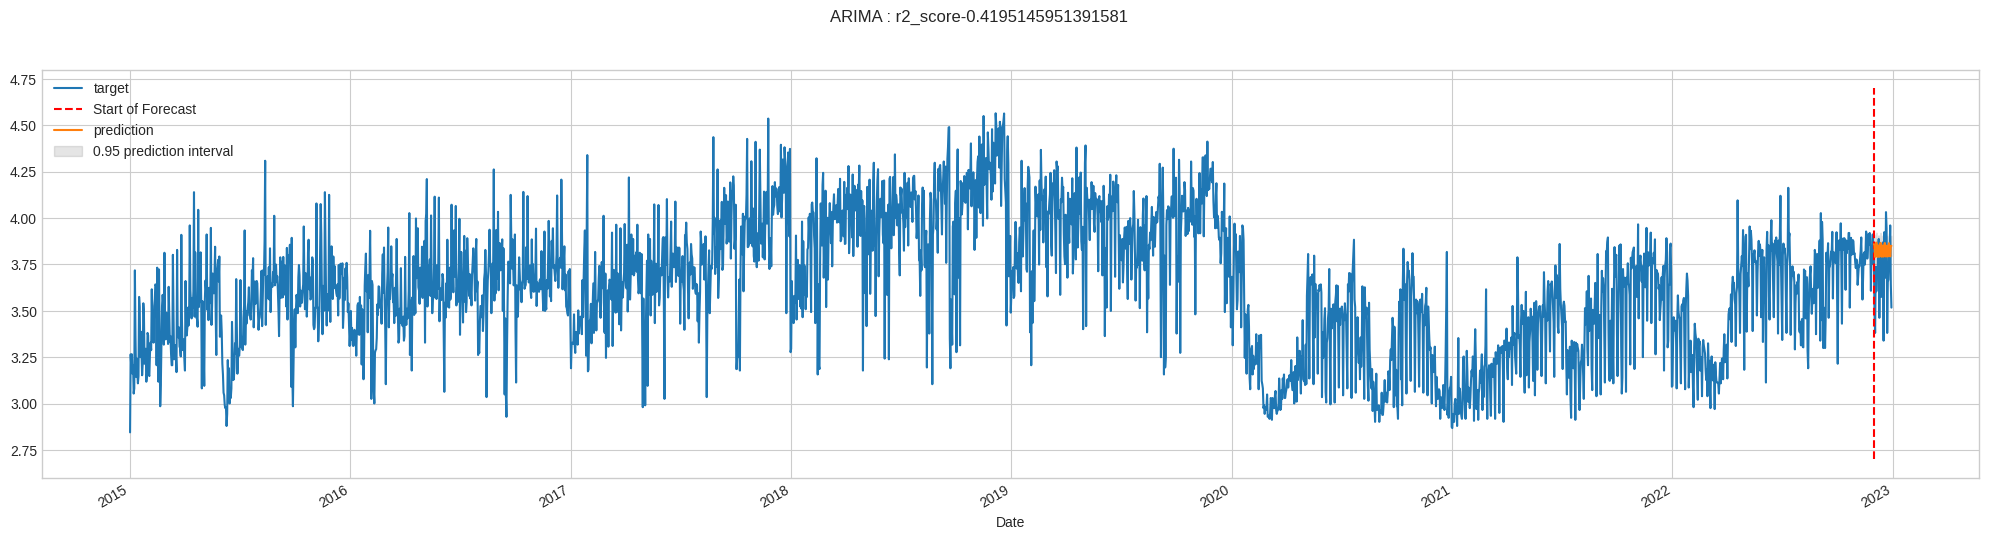

In [94]:
fig, ax = plt.subplots(figsize=(25, 6))
df.plot(ax=ax)
ax.vlines('2022-12-01', 2.7, 4.7, linestyle='--', color='r', label='Start of Forecast')
ax.plot(predict_index, predicted_value, label = 'prediction')
ax.fill_between(predict_index, predicted_lb, predicted_ub, color='k', alpha=0.1, label='0.95 prediction interval')
ax.legend(loc='upper left')
plt.suptitle(f'ARIMA : r2_score{r2}')
plt.show()

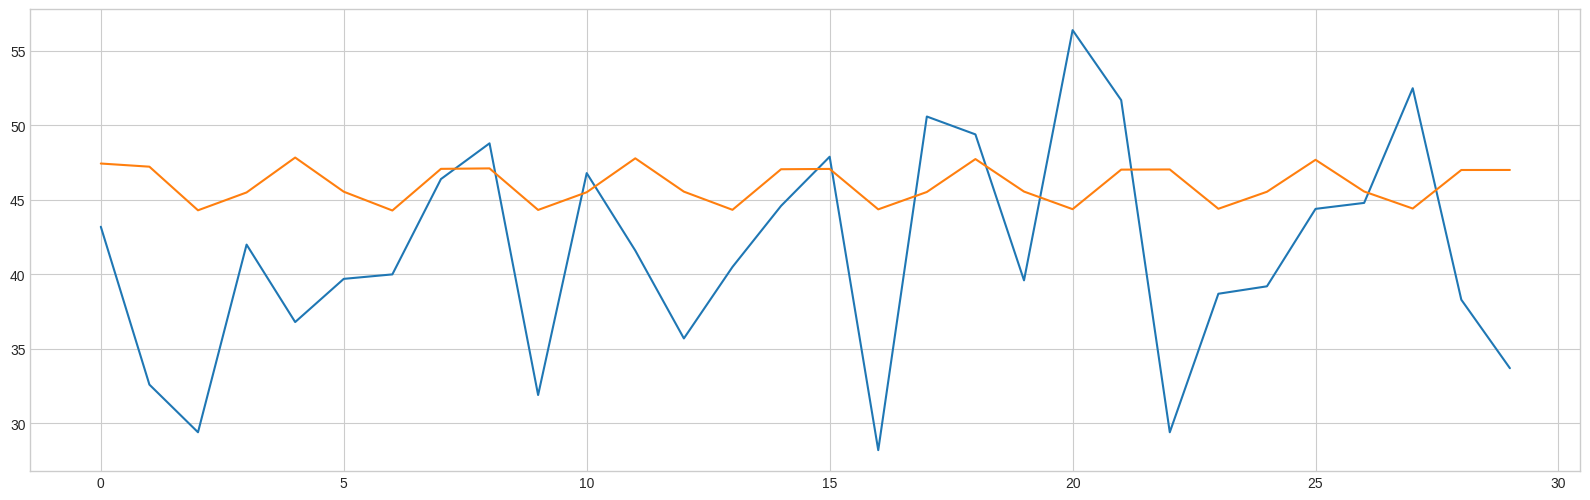

In [101]:
plt.figure(figsize=(20,6))
plt.plot(np.exp(test.values))
plt.plot(np.exp(predicted_value))
plt.show()

In [9]:
from pmdarima.arima import auto_arima

model = auto_arima(train, seasonal=True, start_p=3, start_q=0, max_p=4, max_q=1, d=1, D=1, m=7, min_P=3, max_P=4, max_Q=1, stepwise=True, error_action='ignore', suppress_warnings=True)
print(model.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                 2894
Model:             SARIMAX(4, 1, 0)x(4, 1, 0, 7)   Log Likelihood                 607.283
Date:                           Thu, 20 Apr 2023   AIC                          -1196.565
Time:                                   08:51:04   BIC                          -1142.856
Sample:                                        0   HQIC                         -1177.208
                                          - 2894                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5947      0.014    -43.522      0.000      -0.622      -0.568
ar.L2         -0.4248      0.017    -24.920

In [10]:
from sklearn.metrics import r2_score

# 모델 예측
prediction = model.predict(len(test), alpha=0.05)
predicted_value = prediction
predicted_ub = prediction + 1.96 * prediction.std()
predicted_lb = prediction - 1.96 * prediction.std()
predict_index = test.index
r2 = r2_score(test.values, predicted_value)
predicted_value

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


2894    3.867456
2895    3.848851
2896    3.724334
2897    3.800723
2898    3.799464
2899    3.870196
2900    3.829103
2901    3.877921
2902    3.845630
2903    3.724094
2904    3.801781
2905    3.807663
2906    3.888390
2907    3.838664
2908    3.894021
2909    3.868070
2910    3.727390
2911    3.810630
2912    3.817545
2913    3.901862
2914    3.843070
2915    3.896491
2916    3.885740
2917    3.750516
2918    3.827580
2919    3.823177
2920    3.914072
2921    3.856439
2922    3.909822
2923    3.885430
dtype: float64

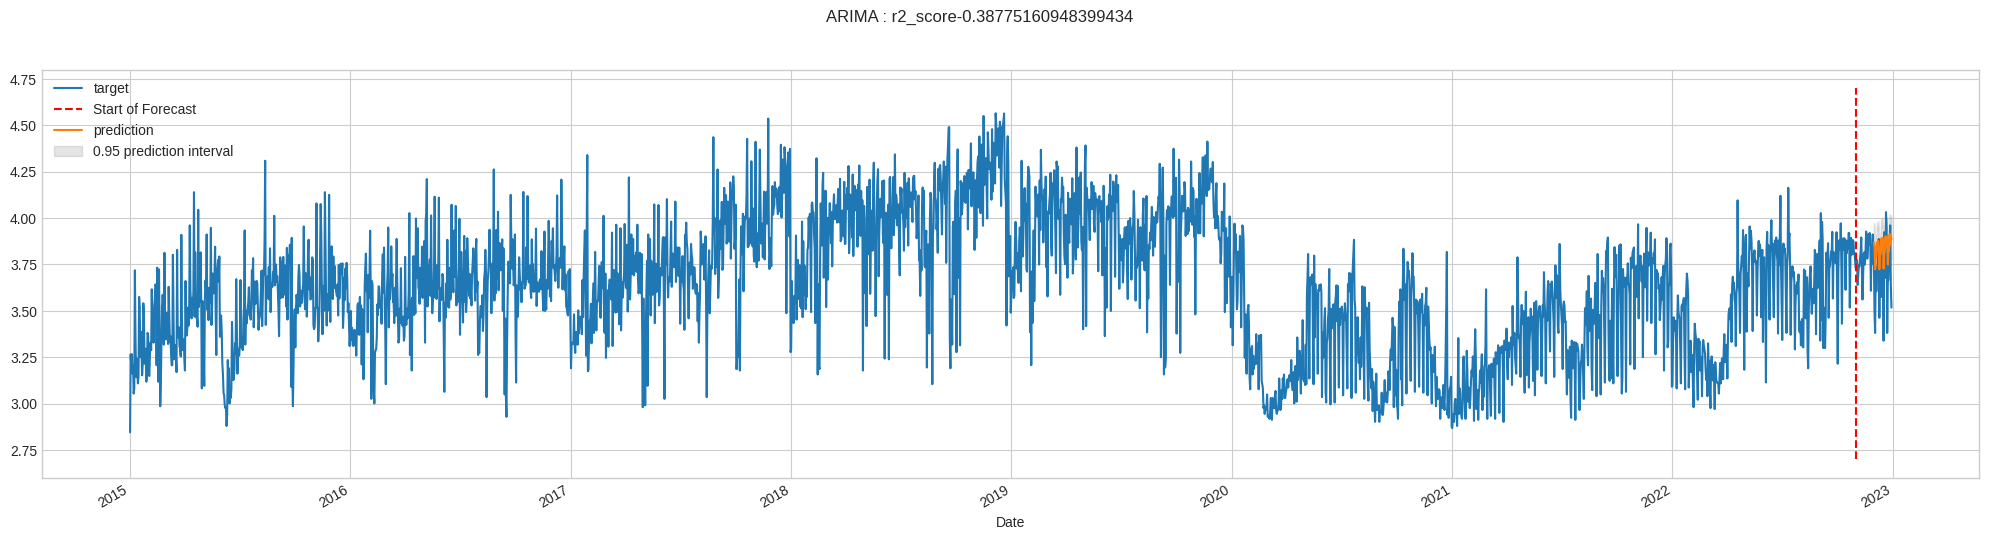

In [11]:
fig, ax = plt.subplots(figsize=(25, 6))
df.plot(ax=ax)
ax.vlines('2022-11-02', 2.7, 4.7, linestyle='--', color='r', label='Start of Forecast')
ax.plot(predict_index, predicted_value, label = 'prediction')
ax.fill_between(predict_index, predicted_lb, predicted_ub, color='k', alpha=0.1, label='0.95 prediction interval')
ax.legend(loc='upper left')
plt.suptitle(f'ARIMA : r2_score{r2}')
plt.show()

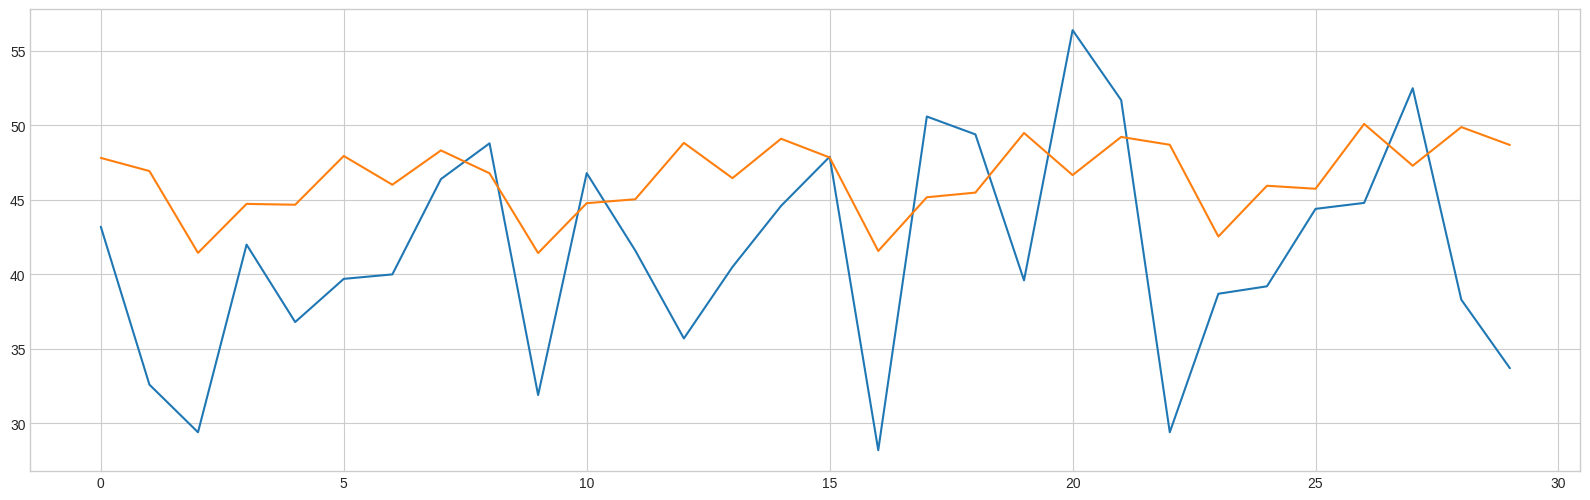

In [12]:
plt.figure(figsize=(20,6))
plt.plot(np.exp(test.values))
plt.plot(np.exp(predicted_value.values))
plt.show()

In [107]:
r2

-0.5834797576016497